# Monte Carlo Simulator Scenarios

### Import classes

In [1]:
import pandas as pd
from montecarlo.montecarlo import (
    Die,
    Game,
    Analyzer
)

### Scenario 1: A 2-headed coin

Relative Frequenct of Jackpots


<AxesSubplot:xlabel='game'>

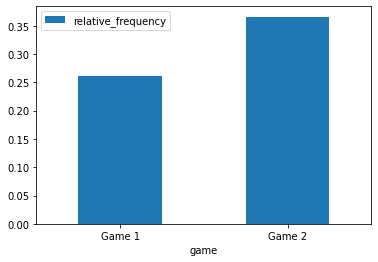

In [3]:
faces = ['H', 'T']
# Fair coin uses the default weight of 1 for all faces
fair_coin = Die(faces = faces)

# Unfair coin has one face with a weight of 5
unfair_coin = Die(faces = faces)
unfair_coin.change_weight(face = 'H', weight = 5)

total_rolls = 1000

# A Game that uses 3 fair dice. Rolls 1000 times
game_1 = Game(dice = [fair_coin] * 3)
game_1.play(rolls = total_rolls)

# A Game that uses 2 unfair dice and 1 fair dice. Rolls 1000 times
game_2 = Game(dice = ([unfair_coin] * 2) + [fair_coin])
game_2.play(rolls = total_rolls)

# Use an Analyzer for each Game to compute the relative frequency of jackpots – getting either all Hs or all Ts
# Relative frequency is computed as the number of jackpots over the total number of rolls
analyzer_1 = Analyzer(game = game_1)
game_1_jackpot = analyzer_1.jackpot()
game_1_relative_frequency = game_1_jackpot / total_rolls

analyzer_2 = Analyzer(game = game_2)
game_2_jackpot = analyzer_2.jackpot()
game_2_relative_frequency = game_2_jackpot / total_rolls

# Compare the results in a bar chart
print('Relative Frequenct of Jackpots')
results_df = pd.DataFrame({
    'game': ['Game 1', 'Game 2'],
    'relative_frequency': [game_1_relative_frequency, game_2_relative_frequency]
})
results_df.plot.bar(x = 'game', y = 'relative_frequency', rot = 0)

### Scenario 2: A 6-sided die

Relative Frequenct of Jackpots


<AxesSubplot:xlabel='game'>

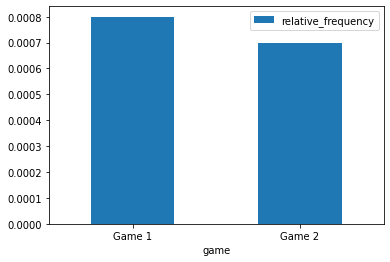

In [5]:
faces = range(1, 7)
# Fair die uses the default weight of 1 for all faces
fair_die = Die(faces = faces)

# Unfair die type 1 with face 6 having a weight of 5
unfair_die_type_1 = Die(faces = faces)
unfair_die_type_1.change_weight(face = 6, weight = 5)

# Unfair die type 2 with face 1 having a weight of 5
unfair_die_type_2 = Die(faces = faces)
unfair_die_type_2.change_weight(face = 1, weight = 5)

total_rolls = 10000

# A Game that uses 5 fair dice. Rolls 10000 times
game_1 = Game(dice = [fair_die] * 5)
game_1.play(rolls = total_rolls)

# A Game that uses 2 fair dice, 2 type 1 unfair dice, and 1 type 2 unfair die. Rolls 10000 times
game_2 = Game(dice = ([unfair_die_type_1] * 2) + [unfair_die_type_2] + ([fair_die] * 2))
game_2.play(rolls = total_rolls)

# Use an Analyzer for each Game to compute the relative frequency of jackpots
# Relative frequency is computed as the number of jackpots over the total number of rolls
analyzer_1 = Analyzer(game = game_1)
game_1_jackpot = analyzer_1.jackpot()
game_1_relative_frequency = game_1_jackpot / total_rolls

analyzer_2 = Analyzer(game = game_2)
game_2_jackpot = analyzer_2.jackpot()
game_2_relative_frequency = game_2_jackpot / total_rolls

# Compare the results in a bar chart
print('Relative Frequenct of Jackpots')
results_df = pd.DataFrame({
    'game': ['Game 1', 'Game 2'],
    'relative_frequency': [game_1_relative_frequency, game_2_relative_frequency]
})
results_df.plot.bar(x = 'game', y = 'relative_frequency', rot = 0)

10 Most Frequent combinations: Game 1


<AxesSubplot:xlabel='face_1,face_2,face_3,face_4,face_5'>

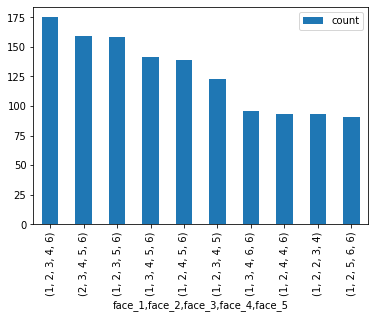

In [6]:
# Compute the top 10 most frequent combinations for each game
# Plot each of these as bar charts
print('10 Most Frequent combinations: Game 1')
analyzer_1.combo()
top_combos_1 = analyzer_1.combos.sort_values('count', ascending = False).head(10)
top_combos_1.plot.bar(y = 'count')

10 Most Frequent combinations: Game 2


<AxesSubplot:xlabel='face_1,face_2,face_3,face_4,face_5'>

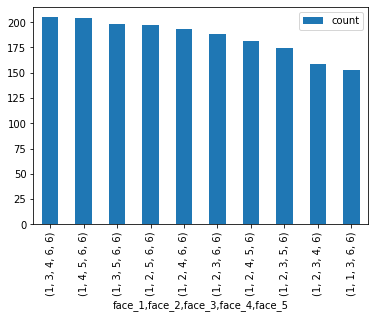

In [7]:
print('10 Most Frequent combinations: Game 2')
analyzer_2.combo()
top_combos_2 = analyzer_2.combos.sort_values('count', ascending = False).head(10)
top_combos_2.plot.bar(y = 'count')

### Scenario 3: Letters of the Roman Alphabet

In [9]:
# A die with all the letters of the alphabet using weights based on their frequency of usage
alphabet_reference = pd.DataFrame(
    [['A', 8.4966],
    ['B', 2.0720],
    ['C', 4.5388],
    ['D', 3.3844],
    ['E', 11.1607],
    ['F', 1.8121],
    ['G', 2.4705],
    ['H', 3.0034],
    ['I', 7.5448],
    ['J', 0.1965],
    ['K', 1.1016],
    ['L', 5.4893],
    ['M', 3.0129],
    ['N', 6.6544],
    ['O', 7.1635],
    ['P', 3.1671],
    ['Q', 0.1962],
    ['R', 7.5809],
    ['S', 5.7351],
    ['T', 6.9509],
    ['U', 3.6308],
    ['V', 1.0074],
    ['W', 1.2899],
    ['X', 0.2902],
    ['Y', 1.7779],
    ['Z', 0.2722]], 
    columns = ['face', 'weight']
)
alphabet_die = Die(faces = alphabet_reference.face.values.tolist())
for a in alphabet_reference.to_dict('records'):
    alphabet_die.change_weight(face = a['face'], weight = a['weight'])

# A Game with 5 of these alphabet dice. Rolls 1000 times
total_rolls = 1000
game = Game(dice = [alphabet_die] * 5)
game.play(rolls = total_rolls)
game_results = game.show_play_results()
game_results

die_number,0,1,2,3,4
roll_number,,,,,
0,O,E,U,D,L
1,I,H,E,E,B
2,T,E,L,I,R
3,A,A,K,T,R
4,E,S,E,O,O
...,...,...,...,...,...
995,E,C,T,A,C
996,E,N,H,A,W
997,T,L,A,E,R


In [11]:
# Based on an eye test, count how many combos look like actual words
# Some results resembled words, meaning they are 1 or 2 letters off from being actual words
actual_words = 5
resembled_words = 15

relative_frequency = (actual_words + resembled_words) / total_rolls
print('Relative Frequency:', relative_frequency)

Relative Frequency: 0.02


To get a better result of relative frequency, 
the [english-words](https://pypi.org/project/english-words/) library was used to detect 
if the words generated are in English:

In [14]:
from english_words import english_words_set

game_results['word'] = game_results[[0, 1, 2, 3, 4]].agg(''.join, axis = 1)
game_results['is_english'] = game_results['word']\
    .apply(lambda x: 1 if x.lower() in english_words_set else 0)
print(game_results[game_results['is_english'] == 1])

actual_words = game_results['is_english'].sum().item()
actual_relative_frequency = actual_words / 1000
print('Actual Relative Frequency:', actual_relative_frequency)

             0  1  2  3  4   word  is_english
roll_number                                  
62           T  E  R  S  E  TERSE           1
115          R  O  D  E  O  RODEO           1
373          S  T  O  R  E  STORE           1
Actual Relative Frequency: 0.003
